# Preparação do ambiente

In [1]:
# instalação de bibliotecas
!pip install --quiet pyspark
#!pip install --quiet google-cloud-bigquery
#!pip install --quiet google-cloud-bigquery-storage
#!pip install --quiet --upgrade google-cloud-storage
#!pip install --quiet db-dtypes

In [2]:
# importação de bibliotecas
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# montando o google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# especificando o caminho dos dados de origem, em formato csv
dados = '/content/drive/MyDrive/Workspace/fiap/pos-tech/data-analytics'
dados += '/fase-3/02-tech-challenge/dados'

In [5]:
# criando a sessão spark
spark = SparkSession.builder\
                    .appName('fase-3-tech-challenge-da').getOrCreate()
                    #.config("spark.jars.packages", "com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.27.0")\


# Carga dos dados brutos e inclusão dos dados auxiliares

_Dados auxiliares obtidos através do dicionários de dados obtido no site do IBGE._

## Dados auxiliares

In [6]:
# valores da variável uf
uf = {
    '11': 'Rondônia',
    '12': 'Acre',
    '13': 'Amazonas',
    '14': 'Roraima',
    '15': 'Pará',
    '16': 'Amapá',
    '17': 'Tocantins',
    '21': 'Maranhão',
    '22': 'Piauí',
    '23': 'Ceará',
    '24': 'Rio Grande do Norte',
    '25': 'Paraíba',
    '26': 'Pernambuco',
    '27': 'Alagoas',
    '28': 'Sergipe',
    '29': 'Bahia',
    '31': 'Minas Gerais',
    '32': 'Espírito Santo',
    '33': 'Rio de Janeiro',
    '35': 'São Paulo',
    '41': 'Paraná',
    '42': 'Santa Catarina',
    '43': 'Rio Grande do Sul',
    '50': 'Mato Grosso do Sul',
    '51': 'Mato Grosso',
    '52': 'Goiás',
    '53': 'Distrito Federal'
}

data_uf = [{'uf': key, 'uf_val': value} for key, value in uf.items()]

df_uf = spark.createDataFrame(data_uf)

In [7]:
# valores da variável capital
capital = {
    '11': 'Porto Velho',
    '12': 'Rio Branco',
    '13': 'Manaus',
    '14': 'Boa Vista',
    '15': 'Belém',
    '16': 'Macapá',
    '17': 'Palmas',
    '21': 'São Luís',
    '22': 'Teresina',
    '23': 'Fortaleza',
    '24': 'Natal',
    '25': 'João Pessoa',
    '26': 'Recife',
    '27': 'Maceió',
    '28': 'Aracaju',
    '29': 'Salvador',
    '31': 'Belo Horizonte',
    '32': 'Vitória',
    '33': 'Rio de Janeiro',
    '35': 'São Paulo',
    '41': 'Curitiba',
    '42': 'Florianópolis',
    '43': 'Porto Alegre',
    '50': 'Campo Grande',
    '51': 'Cuiabá',
    '52': 'Goiânia',
    '53': 'Brasília'
}

data_capital = [{'capital': key, 'capital_val': value}
                for key, value in capital.items()]

df_capital = spark.createDataFrame(data_capital)

In [8]:
# valores da variável rm_ride - ride: região integrada de desenvolvimento
rm_ride = {
    '13': 'Grande Manaus',
    '15': 'Grande Belém',
    '16': 'Grande Macapá',
    '21': 'Grande São Luís',
    '22': 'Grande Teresina',
    '23': 'Grande Fortaleza',
    '24': 'Grande Natal',
    '25': 'Grande João Pessoa',
    '26': 'Grande Recife',
    '27': 'Grande Maceió',
    '28': 'Grande Aracaju',
    '29': 'Grande Salvador',
    '31': 'Grande Belo Horizonte',
    '32': 'Grande Vitória',
    '33': 'Grande Rio de Janeiro',
    '35': 'Grande São Paulo',
    '41': 'Grande Curitiba',
    '42': 'Grande Florianópolis',
    '43': 'Grande Porto Alegre',
    '51': 'Grande Vale do Rio Cuiabá',
    '52': 'Grande Goiânia'
}

data_rm_ride = [{'rm_ride': key, 'rm_ride_val': value}
                for key, value in rm_ride.items()]

df_rm_ride = spark.createDataFrame(data_rm_ride)

In [9]:
# valores da variável v1013
v1013 = {
    '01': 'Janeiro',
    '02': 'Fevereiro',
    '03': 'Março',
    '04': 'Abril',
    '05': 'Maio',
    '06': 'Junho',
    '07': 'Julho',
    '08': 'Agosto',
    '09': 'Setembro',
    '10': 'Outubro',
    '11': 'Novembro',
    '12': 'Dezembro'
}

data_v1013 = [{'v1013': key, 'v1013_val': value}
                for key, value in v1013.items()]

df_v1013 = spark.createDataFrame(data_v1013)

In [10]:
# valores da variável v1022
v1022 = {
    '1': 'Urbana',
    '2': 'Rural'
}

data_v1022 = [{'v1022': key, 'v1022_val': value}
                for key, value in v1022.items()]

df_v1022 = spark.createDataFrame(data_v1022)

In [11]:
# valores da variável v1023
v1023 = {
    '1': 'Capital',
    '2': 'Resto da RM (excluindo a capital)',
    '3': 'Resto da RIDE (excluindo a capital)',
    '4': 'Resto da UF (excluindo a RM e a RIDE)'
}

data_v1023 = [{'v1023': key, 'v1023_val': value}
                for key, value in v1023.items()]

df_v1023 = spark.createDataFrame(data_v1023)

In [12]:
# valores da variável a001a
a001a = {
    '01': 'Pessoa responsável pelo domicílio',
    '02': 'Cônjuge ou companheiro(a) de sexo diferente',
    '03': 'Cônjuge ou companheiro(a) do mesmo sexo',
    '04': 'Filho(a) do responsável e do cônjuge',
    '05': 'Filho(a) somente do responsável',
    '06': 'Filho(a) somente do cônjuge',
    '07': 'Genro ou nora',
    '08': 'Pai, mãe, padrasto ou madrasta',
    '09': 'Sogro(a)',
    '10': 'Neto(a)',
    '11': 'Bisneto(a)',
    '12': 'Irmão ou irmã',
    '13': 'Avô ou avó',
    '14': 'Outro parente',
    '15': 'Agregado(a) - Não parente que não compartilha despesas',
    '16': 'Convivente - Não parente que compartilha despesas',
    '17': 'Pensionista',
    '18': 'Empregado(a) doméstico(a)',
    '19': 'Parente do(a) empregado(a) doméstico(a)'
}

data_a001a = [{'a001a': key, 'a001a_val': value}
                for key, value in a001a.items()]

df_a001a = spark.createDataFrame(data_a001a)

## Carga dos dados à partir dos CSVs

In [13]:
# carregando os dados dos CSVs
df_pnad_covid = spark.read.csv(f'{dados}/pnad-covid-2020-*.csv.gz',
                               header=True)

## Tratamentos dos dados brutos carregados dos CSVs e inclusão das colunas com dados auxiliares

In [14]:
# tratando os nomes das colunas - todas em letras minusculas
df_pnad_covid = df_pnad_covid.toDF(*[_.lower()
                                   for _ in df_pnad_covid.columns])

In [15]:
# incluindo valores auxiliares
df_pnad_covid = df_pnad_covid.join(df_uf, on='uf', how='left')\
                             .join(df_capital, on='capital', how='left')\
                             .join(df_rm_ride, on='rm_ride', how='left')\
                             .join(df_v1013, on='v1013', how='left')\
                             .join(df_v1022, on='v1022', how='left')\
                             .join(df_v1023, on='v1023', how='left')\
                             .join(df_a001a, on='a001a', how='left')

In [16]:
# a001b1_val - tratamento do dia de nascimento
df_pnad_covid = df_pnad_covid.withColumn(
    'a001b1_val',
    F.when(
        F.col('a001b1').cast('int').between(1, 31),
        F.col('a001b1')
    ).when(
        F.col('a001b1') == '99',
        'Não informado'
    ).otherwise(None)
)

In [17]:
# a001b2_val - tratamento do mês de nascimento
month_map_expr = F.create_map([F.lit(_) for i in v1013.items() for _ in i])

df_pnad_covid = df_pnad_covid.withColumn(
    'a001b2_val',
    F.when(
        F.col('a001b2').isin(*v1013.keys()),
        month_map_expr[F.col('a001b2')]
    ).when(
        F.col('a001b1') == '99',
        'Não informado'
    ).otherwise(None)
)

In [18]:
# a001b3_val - tratamento do ano de nascimento
df_pnad_covid = df_pnad_covid.withColumn(
    'a001b3_val',
    F.when(
        F.col('a001b3').cast('int') < 9999,
        F.col('a001b3')
    ).when(
        F.col('a001b3') == '9999',
        'Não informado'
    ).otherwise(None)
)

In [19]:
# a003_val - tratamento da informação do sexo biológico
df_pnad_covid = df_pnad_covid.withColumn(
    'a003_val',
    F.expr("""
        CASE
            WHEN a003 = '1' THEN 'Masculino'
            WHEN a003 = '2' THEN 'Feminino'
            ELSE NULL
        END
    """)
)

In [20]:
# a004_val - tratamento da informação de etnia
df_pnad_covid = df_pnad_covid.withColumn(
    'a004_val',
    F.expr("""
        CASE
            WHEN a004 = '1' THEN 'Branca'
            WHEN a004 = '2' THEN 'Preta'
            WHEN a004 = '3' THEN 'Amarela'
            WHEN a004 = '4' THEN 'Parda'
            WHEN a004 = '5' THEN 'Indígena'
            WHEN a004 = '9' THEN 'Ignorado'
            ELSE NULL
        END
    """)
)

In [21]:
# a005_val - tratamento da informação de escolaridade
df_pnad_covid = df_pnad_covid.withColumn(
    'a005_val',
    F.expr("""
        CASE
            WHEN a005 = '1' THEN 'Sem instrução'
            WHEN a005 = '2' THEN 'Fundamental incompleto'
            WHEN a005 = '3' THEN 'Fundamental completa'
            WHEN a005 = '4' THEN 'Médio incompleto'
            WHEN a005 = '5' THEN 'Médio completo'
            WHEN a005 = '6' THEN 'Superior incompleto'
            WHEN a005 = '7' THEN 'Superior completo'
            WHEN a005 = '8' THEN 'Pós-graduação, mestrado ou doutorado'
            ELSE NULL
        END
    """)
)

In [22]:
# a006_val - frequenta escola
df_pnad_covid = df_pnad_covid.withColumn(
    'a006_val',
    F.expr("""
        CASE
            WHEN a006 = '1' THEN 'Sim'
            WHEN a006 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [23]:
# a007_val - atividades escolares para realizar em casa
df_pnad_covid = df_pnad_covid.withColumn(
    'a007_val',
    F.expr("""
        CASE
            WHEN a007 = '1' THEN 'Sim, e realizou pelo menos parte delas'
            WHEN a007 = '2' THEN 'Sim, mas não realizou (por qualquer motivo)'
            WHEN a007 = '3' THEN 'Não'
            WHEN a007 = '4' THEN 'Não, porque estava de férias'
            ELSE 'Não aplicável'
        END
    """)
)

In [24]:
# a008_val - quantidade de dias dedicados a atividades escolares
df_pnad_covid = df_pnad_covid.withColumn(
    'a008_val',
    F.expr("""
        CASE
            WHEN a008 = '1' THEN '1 dia'
            WHEN a008 = '2' THEN '2 dias'
            WHEN a008 = '3' THEN '3 dias'
            WHEN a008 = '4' THEN '4 dias'
            WHEN a008 = '5' THEN '5 dias'
            WHEN a008 = '6' THEN '6 ou 7 dias'
            ELSE 'Não aplicável'
        END
    """)
)

In [25]:
# a009_val - quantidade de horas diárias dedicadas a atividades escolares
df_pnad_covid = df_pnad_covid.withColumn(
    'a009_val',
    F.expr("""
        CASE
            WHEN a009 = '1' THEN 'Menos de 1 hora'
            WHEN a009 = '2' THEN 'De 1 hora a menos de 2 horas'
            WHEN a009 = '3' THEN 'De 2 horas a menos de 5 horas'
            WHEN a009 = '4' THEN '5 horas ou mais'
            ELSE 'Não aplicável'
        END
    """)
)

In [26]:
# b0011_val - febre na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0011_val',
    F.expr("""
        CASE
            WHEN b0011 = '1' THEN 'Sim'
            WHEN b0011 = '2' THEN 'Não'
            WHEN b0011 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [27]:
# b0012_val - tosse na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0012_val',
    F.expr("""
        CASE
            WHEN b0012 = '1' THEN 'Sim'
            WHEN b0012 = '2' THEN 'Não'
            WHEN b0012 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [28]:
# b0013_val - dor de garganta na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0013_val',
    F.expr("""
        CASE
            WHEN b0013 = '1' THEN 'Sim'
            WHEN b0013 = '2' THEN 'Não'
            WHEN b0013 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [29]:
# b0014_val - dificuldade para respirar na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0014_val',
    F.expr("""
        CASE
            WHEN b0014 = '1' THEN 'Sim'
            WHEN b0014 = '2' THEN 'Não'
            WHEN b0014 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [30]:
# b0015_val - dor de cabeça na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0015_val',
    F.expr("""
        CASE
            WHEN b0015 = '1' THEN 'Sim'
            WHEN b0015 = '2' THEN 'Não'
            WHEN b0015 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [31]:
# b0016_val - dor no peito na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0016_val',
    F.expr("""
        CASE
            WHEN b0016 = '1' THEN 'Sim'
            WHEN b0016 = '2' THEN 'Não'
            WHEN b0016 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [32]:
# b0017_val - náusea na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0017_val',
    F.expr("""
        CASE
            WHEN b0017 = '1' THEN 'Sim'
            WHEN b0017 = '2' THEN 'Não'
            WHEN b0017 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [33]:
# b0018_val - nariz entupido ou coriza na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0018_val',
    F.expr("""
        CASE
            WHEN b0018 = '1' THEN 'Sim'
            WHEN b0018 = '2' THEN 'Não'
            WHEN b0018 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [34]:
# b0019_val - fadiga na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b0019_val',
    F.expr("""
        CASE
            WHEN b0019 = '1' THEN 'Sim'
            WHEN b0019 = '2' THEN 'Não'
            WHEN b0019 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [35]:
# b00110_val - dor nos olhos semana na anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b00110_val',
    F.expr("""
        CASE
            WHEN b00110 = '1' THEN 'Sim'
            WHEN b00110 = '2' THEN 'Não'
            WHEN b00110 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [36]:
# b00111_val - perda de olfato ou paladar na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b00111_val',
    F.expr("""
        CASE
            WHEN b00111 = '1' THEN 'Sim'
            WHEN b00111 = '2' THEN 'Não'
            WHEN b00111 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [37]:
# b00112_val - dor muscular na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b00112_val',
    F.expr("""
        CASE
            WHEN b00112 = '1' THEN 'Sim'
            WHEN b00112 = '2' THEN 'Não'
            WHEN b00112 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [38]:
# b00113_val - diarréia na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'b00113_val',
    F.expr("""
        CASE
            WHEN b00113 = '1' THEN 'Sim'
            WHEN b00113 = '2' THEN 'Não'
            WHEN b00113 = '3' THEN 'Não sabe'
            ELSE 'Ignorado'
        END
    """)
)

In [39]:
# b002_val - procurou estabelecimento de saúde
df_pnad_covid = df_pnad_covid.withColumn(
    'b002_val',
    F.expr("""
        CASE
            WHEN b002 = '1' THEN 'Sim'
            WHEN b002 = '2' THEN 'Não'
            WHEN b002 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [40]:
# b0031_val - providência sobre visitar estabelecimento de saúde
df_pnad_covid = df_pnad_covid.withColumn(
    'b0031_val',
    F.expr("""
        CASE
            WHEN b0031 = '1' THEN 'Sim'
            WHEN b0031 = '2' THEN 'Não'
            WHEN b0031 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [41]:
# b0032_val - providência sobre ligar para profissional de saúde
df_pnad_covid = df_pnad_covid.withColumn(
    'b0032_val',
    F.expr("""
        CASE
            WHEN b0032 = '1' THEN 'Sim'
            WHEN b0032 = '2' THEN 'Não'
            WHEN b0032 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [42]:
# b0033_val - providência sobre tomar remédio por conta própria
df_pnad_covid = df_pnad_covid.withColumn(
    'b0033_val',
    F.expr("""
        CASE
            WHEN b0033 = '1' THEN 'Sim'
            WHEN b0033 = '2' THEN 'Não'
            WHEN b0033 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [43]:
# b0034_val - providência sobre tomar remédio por orientação médica
df_pnad_covid = df_pnad_covid.withColumn(
    'b0034_val',
    F.expr("""
        CASE
            WHEN b0034 = '1' THEN 'Sim'
            WHEN b0034 = '2' THEN 'Não'
            WHEN b0034 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [44]:
# b0035_val - providência sobre receber a visita de um profissional do SUS
df_pnad_covid = df_pnad_covid.withColumn(
    'b0035_val',
    F.expr("""
        CASE
            WHEN b0035 = '1' THEN 'Sim'
            WHEN b0035 = '2' THEN 'Não'
            WHEN b0035 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [45]:
# b0036_val - providência sobre a visita de um profissional de saúde particular
df_pnad_covid = df_pnad_covid.withColumn(
    'b0036_val',
    F.expr("""
        CASE
            WHEN b0036 = '1' THEN 'Sim'
            WHEN b0036 = '2' THEN 'Não'
            WHEN b0036 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [46]:
# b0037_val - outra providdência
df_pnad_covid = df_pnad_covid.withColumn(
    'b0037_val',
    F.expr("""
        CASE
            WHEN b0037 = '1' THEN 'Sim'
            WHEN b0037 = '2' THEN 'Não'
            WHEN b0037 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [47]:
# b0041_val - posto de saúde ou UBS
df_pnad_covid = df_pnad_covid.withColumn(
    'b0041_val',
    F.expr("""
        CASE
            WHEN b0041 = '1' THEN 'Sim'
            WHEN b0041 = '2' THEN 'Não'
            WHEN b0041 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [48]:
# b0042_val - pronto socorro ou UPA
df_pnad_covid = df_pnad_covid.withColumn(
    'b0042_val',
    F.expr("""
        CASE
            WHEN b0042 = '1' THEN 'Sim'
            WHEN b0042 = '2' THEN 'Não'
            WHEN b0042 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [49]:
# b0043_val - hospital do SUS
df_pnad_covid = df_pnad_covid.withColumn(
    'b0043_val',
    F.expr("""
        CASE
            WHEN b0043 = '1' THEN 'Sim'
            WHEN b0043 = '2' THEN 'Não'
            WHEN b0043 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [50]:
# b0044_val - ambulatório privado ou ligado às forças armadas
df_pnad_covid = df_pnad_covid.withColumn(
    'b0044_val',
    F.expr("""
        CASE
            WHEN b0044 = '1' THEN 'Sim'
            WHEN b0044 = '2' THEN 'Não'
            WHEN b0044 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [51]:
# b0045_val - pronto socorro privado ou ligado às forças armadas
df_pnad_covid = df_pnad_covid.withColumn(
    'b0045_val',
    F.expr("""
        CASE
            WHEN b0045 = '1' THEN 'Sim'
            WHEN b0045 = '2' THEN 'Não'
            WHEN b0045 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [52]:
# b0046_val - hospital privado ou ligado às forças armadas
df_pnad_covid = df_pnad_covid.withColumn(
    'b0046_val',
    F.expr("""
        CASE
            WHEN b0046 = '1' THEN 'Sim'
            WHEN b0046 = '2' THEN 'Não'
            WHEN b0046 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [53]:
# b005_val - ficar internado
df_pnad_covid = df_pnad_covid.withColumn(
    'b005_val',
    F.expr("""
        CASE
            WHEN b005 = '1' THEN 'Sim'
            WHEN b005 = '2' THEN 'Não'
            WHEN b005 = '3' THEN 'Não foi atendido'
            WHEN b005 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [54]:
# b006_val - sedado, entubado, respiração artificial
df_pnad_covid = df_pnad_covid.withColumn(
    'b006_val',
    F.expr("""
        CASE
            WHEN b006 = '1' THEN 'Sim'
            WHEN b006 = '2' THEN 'Não'
            WHEN b006 = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [55]:
# b007_val - plano de saúde
df_pnad_covid = df_pnad_covid.withColumn(
    'b007_val',
    F.expr("""
        CASE
            WHEN b007 = '1' THEN 'Sim'
            WHEN b007 = '2' THEN 'Não'
            WHEN b007 = '9' THEN 'Ignorado'
        END
    """)
)

In [56]:
# b008_val - fez exame
df_pnad_covid = df_pnad_covid.withColumn(
    'b008_val',
    F.expr("""
        CASE
            WHEN b008 = '1' THEN 'Sim'
            WHEN b008 = '2' THEN 'Não'
            WHEN b008 = '9' THEN 'Ignorado'
        END
    """)
)

In [57]:
# b009a_val - fez exame com swab
df_pnad_covid = df_pnad_covid.withColumn(
    'b009a_val',
    F.expr("""
        CASE
            WHEN b009a = '1' THEN 'Sim'
            WHEN b009a = '2' THEN 'Não'
            WHEN b009a = '9' THEN 'Ignorado'
        END
    """)
)

In [58]:
# b009b_val - resultado do exame com swab
df_pnad_covid = df_pnad_covid.withColumn(
    'b009b_val',
    F.expr("""
        CASE
            WHEN b009b = '1' THEN 'Positivo'
            WHEN b009b = '2' THEN 'Negativo'
            WHEN b009b = '3' THEN 'Inconclusivo'
            WHEN b009b = '4' THEN 'Ainda não recebeu o resultado'
            WHEN b009b = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [59]:
# b009c_val - fez exame com coleta de sangue no dedo
df_pnad_covid = df_pnad_covid.withColumn(
    'b009c_val',
    F.expr("""
        CASE
            WHEN b009c = '1' THEN 'Sim'
            WHEN b009c = '2' THEN 'Não'
            WHEN b009c = '9' THEN 'Ignorado'
        END
    """)
)

In [60]:
# b009d_val - resultado do exame com coleta de sangue no dedo
df_pnad_covid = df_pnad_covid.withColumn(
    'b009d_val',
    F.expr("""
        CASE
            WHEN b009d = '1' THEN 'Positivo'
            WHEN b009d = '2' THEN 'Negativo'
            WHEN b009d = '3' THEN 'Inconclusivo'
            WHEN b009d = '4' THEN 'Ainda não recebeu o resultado'
            WHEN b009d = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [61]:
# b009e_val - fez exame com coleta de sangue na veia do braço
df_pnad_covid = df_pnad_covid.withColumn(
    'b009e_val',
    F.expr("""
        CASE
            WHEN b009e = '1' THEN 'Sim'
            WHEN b009e = '2' THEN 'Não'
            WHEN b009e = '9' THEN 'Ignorado'
        END
    """)
)

In [62]:
# b009f_val - resultado do exame com coleta de sangue na veia do braço
df_pnad_covid = df_pnad_covid.withColumn(
    'b009f_val',
    F.expr("""
        CASE
            WHEN b009f = '1' THEN 'Positivo'
            WHEN b009f = '2' THEN 'Negativo'
            WHEN b009f = '3' THEN 'Inconclusivo'
            WHEN b009f = '4' THEN 'Ainda não recebeu o resultado'
            WHEN b009f = '9' THEN 'Ignorado'
            ELSE 'Não aplicável'
        END
    """)
)

In [63]:
# b0101_val - diagnóstico de diabetes
df_pnad_covid = df_pnad_covid.withColumn(
    'b0101_val',
    F.expr("""
        CASE
            WHEN b0101 = '1' THEN 'Sim'
            WHEN b0101 = '2' THEN 'Não'
            WHEN b0101 = '9' THEN 'Ignorado'
        END
    """)
)

In [64]:
# b0102_val - diagnóstico de hipertensão
df_pnad_covid = df_pnad_covid.withColumn(
    'b0102_val',
    F.expr("""
        CASE
            WHEN b0102 = '1' THEN 'Sim'
            WHEN b0102 = '2' THEN 'Não'
            WHEN b0102 = '9' THEN 'Ignorado'
        END
    """)
)

In [65]:
# b0103_val - diagnóstico de doença respiratória
df_pnad_covid = df_pnad_covid.withColumn(
    'b0103_val',
    F.expr("""
        CASE
            WHEN b0103 = '1' THEN 'Sim'
            WHEN b0103 = '2' THEN 'Não'
            WHEN b0103 = '9' THEN 'Ignorado'
        END
    """)
)

In [66]:
# b0104_val - diagnóstico de doença cardíaca
df_pnad_covid = df_pnad_covid.withColumn(
    'b0104_val',
    F.expr("""
        CASE
            WHEN b0104 = '1' THEN 'Sim'
            WHEN b0104 = '2' THEN 'Não'
            WHEN b0104 = '9' THEN 'Ignorado'
        END
    """)
)

In [67]:
# b0105_val - diagnóstico de depressão
df_pnad_covid = df_pnad_covid.withColumn(
    'b0105_val',
    F.expr("""
        CASE
            WHEN b0105 = '1' THEN 'Sim'
            WHEN b0105 = '2' THEN 'Não'
            WHEN b0105 = '9' THEN 'Ignorado'
        END
    """)
)

In [68]:
# b0106_val - diagnóstico de câncer
df_pnad_covid = df_pnad_covid.withColumn(
    'b0106_val',
    F.expr("""
        CASE
            WHEN b0106 = '1' THEN 'Sim'
            WHEN b0106 = '2' THEN 'Não'
            WHEN b0106 = '9' THEN 'Ignorado'
        END
    """)
)

In [69]:
# b011_val - restrição de contato
df_pnad_covid = df_pnad_covid.withColumn(
    'b011_val',
    F.expr("""
        CASE
            WHEN b011 = '1' THEN 'Sem restrição, normal como antes da pandemia'
            WHEN b011 = '2' THEN 'Reduziu, mas saindo ou recebendo visitas'
            WHEN b011 = '3' THEN 'Em casa, saindo em caso de necessidade básica'
            WHEN b011 = '4' THEN 'Rigorosamente em casa'
            WHEN b011 = '9' THEN 'Ignorado'
        END
    """)
)

In [70]:
# c001_val - trabalhou na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c001_val',
    F.expr("""
        CASE
            WHEN c001 = '1' THEN 'Sim'
            WHEN c001 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [71]:
# c002_val - afastamento do trabalho na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c002_val',
    F.expr("""
        CASE
            WHEN c002 = '1' THEN 'Sim'
            WHEN c002 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [72]:
# c003_val - motivo do afastamento do trabalho na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c003_val',
    F.expr("""
        CASE
            WHEN c003 = '1' THEN 'Quarentena, isolamento ou férias coletivas'
            WHEN c003 = '2' THEN 'Férias, folga ou jornada de trabalho variável'
            WHEN c003 = '3' THEN 'Licença maternidade ou paternidade'
            WHEN c003 = '4' THEN 'Licença remunerada por saúde ou acidente'
            WHEN c003 = '5' THEN 'Outro tipo de licença remunerada'
            WHEN c003 = '6' THEN 'Afastamento sem remuneração da previdência'
            WHEN c003 = '7' THEN 'Fatores ocasionais - mau tempo, paralisação'
            WHEN c003 = '8' THEN 'Outro motivo'
            ELSE 'Não aplicável'
        END
    """)
)

In [73]:
# c004_val - manteve a remuneração
df_pnad_covid = df_pnad_covid.withColumn(
    'c004_val',
    F.expr("""
        CASE
            WHEN c004 = '1' THEN 'Sim'
            WHEN c004 = '2' THEN 'Não'
            WHEN c004 = '3' THEN 'O trabalho já não era remunerado'
            ELSE 'Não aplicável'
        END
    """)
)

In [74]:
# c005_val - tempo de afastamento
df_pnad_covid = df_pnad_covid.withColumn(
    'c005_val',
    F.expr("""
        CASE
            WHEN c005 = '1' THEN 'Menos de 1 mês'
            WHEN c005 = '2' THEN 'De 1 mês a menos de 1 ano'
            WHEN c005 = '3' THEN 'De 1 ano a menos de 2 anos'
            WHEN c005 = '4' THEN '2 anos ou mais'
            ELSE 'Não aplicável'
        END
    """)
)

In [75]:
# c0051_val - tempo de afastamento - até 1 ano
df_pnad_covid = df_pnad_covid.withColumn(
    'c0051_val',
    F.when(
        F.col('c0051').cast('int').between(1, 11),
        F.col('c0051')
    ).otherwise('Não aplicável')
)

In [76]:
# c0052_val - tempo de afastamento - entre 1 e 2 anos
df_pnad_covid = df_pnad_covid.withColumn(
    'c0052_val',
    F.when(
        F.col('c0052').cast('int').between(0, 11),
        F.col('c0052')
    ).otherwise('Não aplicável')
)

In [77]:
# c0053_val - tempo de afastamento - entre 2 e 98 anos
df_pnad_covid = df_pnad_covid.withColumn(
    'c0053_val',
    F.when(
        F.col('c0053').cast('int').between(2, 98),
        F.col('c0053')
    ).otherwise('Não aplicável')
)

In [78]:
# c006_val - tem mais de um trabalho
df_pnad_covid = df_pnad_covid.withColumn(
    'c006_val',
    F.expr("""
        CASE
            WHEN c006 = '1' THEN 'Sim'
            WHEN c006 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [79]:
# c007_val - ocupação principal da semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c007_val',
    F.expr("""
        CASE
            WHEN c007 = '1' THEN 'Trabalhador doméstico (incl. cuidados, babá)'
            WHEN c007 = '2' THEN 'Militar do exercito, marinha ou aeronáutica'
            WHEN c007 = '3' THEN 'Policial militar ou bombeiro militar'
            WHEN c007 = '4' THEN 'Empregado do setor privado '
            WHEN c007 = '5' THEN 'Empregado do setor público'
            WHEN c007 = '6' THEN 'Empregador'
            WHEN c007 = '7' THEN 'Conta própria'
            WHEN c007 = '8' THEN 'Trabalhador familiar não remunerado'
            WHEN c007 = '9' THEN 'Estava fora do mercado de trabalho'
            ELSE 'Não aplicável'
        END
    """)
)

In [80]:
# c007a_val - ocupação principal da semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c007a_val',
    F.expr("""
        CASE
            WHEN c007a = '1' THEN 'Federal'
            WHEN c007a = '2' THEN 'Estadual'
            WHEN c007a = '3' THEN 'Municipal'
            ELSE 'Não aplicável'
        END
    """)
)

In [81]:
# c007b_val - forma de contrato de trabalho
df_pnad_covid = df_pnad_covid.withColumn(
    'c007b_val',
    F.expr("""
        CASE
            WHEN c007b = '1' THEN 'Sim, tem carteira de trabalho assinada'
            WHEN c007b = '2' THEN 'Sim, é servidor público estatutário'
            WHEN c007b = '3' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [82]:
# c007c_val - ocupação
df_pnad_covid = df_pnad_covid.withColumn(
    'c007c_val',
    F.expr("""
        CASE
            WHEN c007c = '01' THEN 'Empregado doméstico, diarista'
            WHEN c007c = '02' THEN 'Faxineiro, auxiliar de limpeza'
            WHEN c007c = '03' THEN 'Auxiliar de escritório, escriturário'
            WHEN c007c = '04' THEN 'Secretária, recepcionista'
            WHEN c007c = '05' THEN 'Operador de Telemarketing'
            WHEN c007c = '06' THEN 'Comerciante (dono do bar, da loja etc.)'
            WHEN c007c = '07' THEN 'Balconista, vendedor de loja'
            WHEN c007c = '08' THEN 'Vendedor a domicílio, vendedor de catálogo'
            WHEN c007c = '09' THEN 'Vendedor ambulante (comerciante de rua)'
            WHEN c007c = '10' THEN 'Cozinheiro e garçom (de restaurantes)'
            WHEN c007c = '11' THEN 'Padeiro, açougueiro e doceiro'
            WHEN c007c = '12' THEN 'Agricultor, pescador, jardineiro'
            WHEN c007c = '13' THEN 'Auxiliar da agropecuária'
            WHEN c007c = '14' THEN 'Motorista'
            WHEN c007c = '15' THEN 'Motorista de caminhão (caminhoneiro)'
            WHEN c007c = '16' THEN 'Motoboy'
            WHEN c007c = '17' THEN 'Entregador de mercadorias'
            WHEN c007c = '18' THEN 'Pedreiro, pintor, eletricista, marceneiro'
            WHEN c007c = '19' THEN 'Mecânico de veículos, máquinas industriais'
            WHEN c007c = '20' THEN 'Artesão, costureiro e sapateiro'
            WHEN c007c = '21' THEN 'Cabeleireiro, manicure e afins'
            WHEN c007c = '22' THEN 'Operador de máquinas, montador na indústria'
            WHEN c007c = '23' THEN 'Auxiliar de produção, de carga e descarga'
            WHEN c007c = '24' THEN 'Professor (ensino infantil ao superior)'
            WHEN c007c = '25' THEN 'Pedagogo, professor (idiomas, música, arte)'
            WHEN c007c = '26' THEN 'Profissionais de saúde de nível superior'
            WHEN c007c = '27' THEN 'Profissional da saúde de nível médio'
            WHEN c007c = '28' THEN 'Cuidador de crianças, doentes ou idosos'
            WHEN c007c = '29' THEN 'Segurança, vigilante, serviços de proteção'
            WHEN c007c = '30' THEN 'Policial civil'
            WHEN c007c = '31' THEN 'Porteiro, zelador'
            WHEN c007c = '32' THEN 'Artista, religioso (padre, pastor etc.)'
            WHEN c007c = '33' THEN 'Diretor, gerente, cargo comissionado'
            WHEN c007c = '34' THEN 'Outra profissão de nível superior'
            WHEN c007c = '35' THEN 'Outro profissional de nível médio'
            WHEN c007c = '36' THEN 'Outros'
            ELSE 'Não aplicável'
        END
    """)
)

In [83]:
# c007d_val - ramo de atividade do local de trabalho
df_pnad_covid = df_pnad_covid.withColumn(
    'c007d_val',
    F.expr("""
        CASE
            WHEN c007d = '01' THEN 'Agricultura, pecuária, florestal e pesca'
            WHEN c007d = '02' THEN 'Extração de petróleo, minerais, pedra, etc.'
            WHEN c007d = '03' THEN 'Indústria da transformação (incl. confecção)'
            WHEN c007d = '04' THEN 'Fornecimento de serviços essenciais'
            WHEN c007d = '05' THEN 'Construção'
            WHEN c007d = '06' THEN 'Comércio no atacado e varejo'
            WHEN c007d = '07' THEN 'Reparação de veículos automotores'
            WHEN c007d = '08' THEN 'Transporte de passageiros'
            WHEN c007d = '09' THEN 'Transporte de mercadorias'
            WHEN c007d = '10' THEN 'Armazenamento e serviços de entregas'
            WHEN c007d = '11' THEN 'Hospedagem (hotéis, pousadas etc.)'
            WHEN c007d = '12' THEN 'Serviço de alimentação'
            WHEN c007d = '13' THEN 'Informação e comunicação'
            WHEN c007d = '14' THEN 'Bancos, atividades financeiras e de seguros'
            WHEN c007d = '15' THEN 'Atividades imobiliárias'
            WHEN c007d = '16' THEN 'Escritórios de atividades profissionais'
            WHEN c007d = '17' THEN 'Atividades de locação de mão de obra'
            WHEN c007d = '18' THEN 'Administração pública'
            WHEN c007d = '19' THEN 'Educação'
            WHEN c007d = '20' THEN 'Saúde humana e assistência social'
            WHEN c007d = '21' THEN 'Organizações religiosas e associações'
            WHEN c007d = '22' THEN 'Atividade artísticas, esportivas, recreação'
            WHEN c007d = '23' THEN 'Cabeleireiros, tratamento de beleza'
            WHEN c007d = '24' THEN 'Serviço doméstico remunerado'
            WHEN c007d = '25' THEN 'Outro'
            ELSE 'Não aplicável'
        END
    """)
)

In [84]:
# c007e_val - quantidade de empregados (porte da empresa)
df_pnad_covid = df_pnad_covid.withColumn(
    'c007e_val',
    F.expr("""
        CASE
            WHEN c007e = '1' THEN '1 a 5 empregados'
            WHEN c007e = '2' THEN '6 a 10 empregados'
            WHEN c007e = '3' THEN '11 ou mais empregados'
            ELSE 'Não aplicável'
        END
    """)
)

In [85]:
# c007e1_val - quantidade de empregados
df_pnad_covid = df_pnad_covid.withColumn(
    'c007e1_val',
    F.when(
        F.col('c007e1').cast('int').between(1, 5),
        F.col('c007e1')
    ).otherwise('Não aplicável')
)

In [86]:
# c007e2_val - quantidade de empregados
df_pnad_covid = df_pnad_covid.withColumn(
    'c007e2_val',
    F.when(
        F.col('c007e2').cast('int').between(6, 10),
        F.col('c007e2')
    ).otherwise('Não aplicável')
)

In [87]:
# c007f_val - quantidade de empregados
df_pnad_covid = df_pnad_covid.withColumn(
    'c007f_val',
    F.expr("""
        CASE
            WHEN c007f = '1' THEN 'Sim'
            WHEN c007f = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [88]:
# c008_val - quantidade de horas normalmente trabalhava por semana
df_pnad_covid = df_pnad_covid.withColumn(
    'c008_val',
    F.when(
        F.col('c008').cast('int').between(1, 120),
        F.col('c008')
    ).otherwise('Não aplicável')
)

In [89]:
# c009a_val - qtd de horas trabalhadas vs desejadas
df_pnad_covid = df_pnad_covid.withColumn(
    'c009a_val',
    F.expr("""
        CASE
            WHEN c009a = '1' THEN 'Sim'
            WHEN c009a = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [90]:
# c010_val - questão sobre remuneração foi respondida
df_pnad_covid = df_pnad_covid.withColumn(
    'c010_val',
    F.expr("""
        CASE
            WHEN c010 = '1' THEN 'Sim'
            ELSE 'Não aplicável'
        END
    """)
)

In [91]:
# c0101_val - questão sobre forma de recebimento
df_pnad_covid = df_pnad_covid.withColumn(
    'c0101_val',
    F.expr("""
        CASE
            WHEN c0101 = '1' THEN 'Em dinheiro'
            ELSE 'Não aplicável'
        END
    """)
)

In [92]:
# c01011_val - faixa de rendimento
df_pnad_covid = df_pnad_covid.withColumn(
    'c01011_val',
    F.expr("""
        CASE
            WHEN c01011 = '00' THEN '0 - 100'
            WHEN c01011 = '01' THEN '101 - 300'
            WHEN c01011 = '02' THEN '301 - 600'
            WHEN c01011 = '03' THEN '601 - 800'
            WHEN c01011 = '04' THEN '801 - 1.600'
            WHEN c01011 = '05' THEN '1.601 - 3.000'
            WHEN c01011 = '06' THEN '3.001 - 10.000'
            WHEN c01011 = '07' THEN '10.001 - 50.000'
            WHEN c01011 = '08' THEN '50.001 - 100.000'
            WHEN c01011 = '09' THEN 'Mais de 100.000'
            ELSE 'Não aplicável'
        END
    """)
)

In [93]:
# c01012_val - valor em reais
df_pnad_covid = df_pnad_covid.withColumn(
    'c01012_val',
    F.expr("""
        CASE
            WHEN c01012 IS NULL THEN 'Não aplicável'
            ELSE c01012
        END
    """)
)

In [94]:
# c0102_val - questão sobre recebimento em mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c0102_val',
    F.expr("""
        CASE
            WHEN c0102 = '2' THEN 'Em produtos ou mercadorias'
            ELSE 'Não aplicável'
        END
    """)
)

In [95]:
# c01021_val - faixa de recebimento em mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c01021_val',
    F.expr("""
        CASE
            WHEN c01021 = '00' THEN '0 - 100'
            WHEN c01021 = '01' THEN '101 - 300'
            WHEN c01021 = '02' THEN '301 - 600'
            WHEN c01021 = '03' THEN '601 - 800'
            WHEN c01021 = '04' THEN '801 - 1.600'
            WHEN c01021 = '05' THEN '1.601 - 3.000'
            WHEN c01021 = '06' THEN '3.001 - 10.000'
            WHEN c01021 = '07' THEN '10.001 - 50.000'
            WHEN c01021 = '08' THEN '50.001 - 100.000'
            WHEN c01021 = '09' THEN 'Mais de 100.000'
            ELSE 'Não aplicável'
        END
    """)
)

In [96]:
# c01022_val - valor em produtos ou mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c01022_val',
    F.expr("""
        CASE
            WHEN c01022 IS NULL THEN 'Não aplicável'
            ELSE c01022
        END
    """)
)

In [97]:
# c0103_val - questão sobre recebimento em benefícios
df_pnad_covid = df_pnad_covid.withColumn(
    'c0103_val',
    F.expr("""
        CASE
            WHEN c0103 = '3' THEN 'Em benefícios'
            ELSE 'Não aplicável'
        END
    """)
)

In [98]:
# c0104_val - questão sobre ser ou não remunerado
df_pnad_covid = df_pnad_covid.withColumn(
    'c0104_val',
    F.expr("""
        CASE
            WHEN c0104 = '4' THEN 'Não remunerado'
            ELSE 'Não aplicável'
        END
    """)
)

In [99]:
# c011a_val - questão sobre remuneração efetiva foi respondida
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a_val',
    F.expr("""
        CASE
            WHEN c011a = '1' THEN 'Sim'
            ELSE 'Não aplicável'
        END
    """)
)

In [100]:
# c011a1_val - questão sobre forma de recebimento efetivo em dinheiro
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a1_val',
    F.expr("""
        CASE
            WHEN c011a1 = '1' THEN 'Em dinheiro'
            ELSE 'Não aplicável'
        END
    """)
)

In [101]:
# c011a11_val - faixa de recebimento efetivo em dinheiro
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a11_val',
    F.expr("""
        CASE
            WHEN c011a11 = '00' THEN '0 - 100'
            WHEN c011a11 = '01' THEN '101 - 300'
            WHEN c011a11 = '02' THEN '301 - 600'
            WHEN c011a11 = '03' THEN '601 - 800'
            WHEN c011a11 = '04' THEN '801 - 1.600'
            WHEN c011a11 = '05' THEN '1.601 - 3.000'
            WHEN c011a11 = '06' THEN '3.001 - 10.000'
            WHEN c011a11 = '07' THEN '10.001 - 50.000'
            WHEN c011a11 = '08' THEN '50.001 - 100.000'
            WHEN c011a11 = '09' THEN 'Mais de 100.000'
            ELSE 'Não aplicável'
        END
    """)
)

In [102]:
# c011a12_val - valor efetivo em reais
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a12_val',
    F.expr("""
        CASE
            WHEN c011a12 IS NULL THEN 'Não aplicável'
            ELSE c011a12
        END
    """)
)

In [103]:
# c011a2_val - questão sobre recebimento efetivo em mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a2_val',
    F.expr("""
        CASE
            WHEN c011a2 = '2' THEN 'Em produtos ou mercadorias'
            ELSE 'Não aplicável'
        END
    """)
)

In [104]:
# c011a21_val - faixa de recebimento efetivo em mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a21_val',
    F.expr("""
        CASE
            WHEN c011a21 = '00' THEN '0 - 100'
            WHEN c011a21 = '01' THEN '101 - 300'
            WHEN c011a21 = '02' THEN '301 - 600'
            WHEN c011a21 = '03' THEN '601 - 800'
            WHEN c011a21 = '04' THEN '801 - 1.600'
            WHEN c011a21 = '05' THEN '1.601 - 3.000'
            WHEN c011a21 = '06' THEN '3.001 - 10.000'
            WHEN c011a21 = '07' THEN '10.001 - 50.000'
            WHEN c011a21 = '08' THEN '50.001 - 100.000'
            WHEN c011a21 = '09' THEN 'Mais de 100.000'
            ELSE 'Não aplicável'
        END
    """)
)

In [105]:
# c011a22_val - valor efetivo em produtos e mercadorias
df_pnad_covid = df_pnad_covid.withColumn(
    'c011a22_val',
    F.expr("""
        CASE
            WHEN c011a22 IS NULL THEN 'Não aplicável'
            ELSE c011a22
        END
    """)
)

In [106]:
# c012_val - manteve o mesmo local de trabalho na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c012_val',
    F.expr("""
        CASE
            WHEN c012 = '1' THEN 'Sim'
            WHEN c012 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [107]:
# c013_val - home office na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c013_val',
    F.expr("""
        CASE
            WHEN c013 = '1' THEN 'Sim'
            WHEN c013 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [108]:
# c014_val - contribui para o INSS
df_pnad_covid = df_pnad_covid.withColumn(
    'c014_val',
    F.expr("""
        CASE
            WHEN c014 = '1' THEN 'Sim'
            WHEN c014 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [109]:
# c015_val - procurou trabalho na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c015_val',
    F.expr("""
        CASE
            WHEN c015 = '1' THEN 'Sim'
            WHEN c015 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [110]:
# c016_val - motivo para não procurar trabalho na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c016_val',
    F.expr("""
        CASE
            WHEN c016 = '01' THEN 'Devido à pandemia (isolamento, quarentena)'
            WHEN c016 = '02' THEN 'Por problemas de saúde ou gravidez '
            WHEN c016 = '03' THEN 'Estava estudando'
            WHEN c016 = '04' THEN 'Não quer trabalhar ou é aposentado'
            WHEN c016 = '05' THEN 'Sem experiência profissional ou qualificação'
            WHEN c016 = '06' THEN 'Não vai encontrar trabalho pela idade'
            WHEN c016 = '07' THEN 'Não havia trabalho na localidade'
            WHEN c016 = '08' THEN 'Afazeres domésticos ou cuidar de parentes'
            WHEN c016 = '09' THEN 'Estava aguardando resposta de medida tomada'
            WHEN c016 = '10' THEN 'Outro motivo'
            ELSE 'Não aplicável'
        END
    """)
)

In [111]:
# c017a_val - gostaria de ter trabalhado na semana anterior
df_pnad_covid = df_pnad_covid.withColumn(
    'c017a_val',
    F.expr("""
        CASE
            WHEN c017a = '1' THEN 'Sim'
            WHEN c017a = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [112]:
# d0011_val - rendimento de aposentadoria
df_pnad_covid = df_pnad_covid.withColumn(
    'd0011_val',
    F.expr("""
        CASE
            WHEN d0011 = '1' THEN 'Sim'
            WHEN d0011 = '2' THEN 'Não'
        END
    """)
)

In [113]:
# d0013_val - valor rendimento de aposentadoria
df_pnad_covid = df_pnad_covid.withColumn(
    'd0013_val',
    F.expr("""
        CASE
            WHEN d0013 IS NULL THEN 'Não aplicável'
            ELSE d0013
        END
    """)
)

In [114]:
# d0021_val - rendimento de pensão alimentícia
df_pnad_covid = df_pnad_covid.withColumn(
    'd0021_val',
    F.expr("""
        CASE
            WHEN d0021 = '1' THEN 'Sim'
            WHEN d0021 = '2' THEN 'Não'
        END
    """)
)

In [115]:
# d0023_val - valor rendimento de pensão alimentícia
df_pnad_covid = df_pnad_covid.withColumn(
    'd0023_val',
    F.expr("""
        CASE
            WHEN d0023 IS NULL THEN 'Não aplicável'
            ELSE d0023
        END
    """)
)

In [116]:
# d0031_val - rendimento bolsa família
df_pnad_covid = df_pnad_covid.withColumn(
    'd0031_val',
    F.expr("""
        CASE
            WHEN d0031 = '1' THEN 'Sim'
            WHEN d0031 = '2' THEN 'Não'
        END
    """)
)

In [117]:
# d0033_val - valor rendimento bolsa família
df_pnad_covid = df_pnad_covid.withColumn(
    'd0033_val',
    F.expr("""
        CASE
            WHEN d0033 IS NULL THEN 'Não aplicável'
            ELSE d0033
        END
    """)
)

In [118]:
# d0041_val - rendimento BPC-LOAS
df_pnad_covid = df_pnad_covid.withColumn(
    'd0041_val',
    F.expr("""
        CASE
            WHEN d0041 = '1' THEN 'Sim'
            WHEN d0041 = '2' THEN 'Não'
        END
    """)
)

In [119]:
# d0043_val - valor rendimento BPC-LOAS
df_pnad_covid = df_pnad_covid.withColumn(
    'd0043_val',
    F.expr("""
        CASE
            WHEN d0043 IS NULL THEN 'Não aplicável'
            ELSE d0043
        END
    """)
)

In [120]:
# d0051_val - rendimento BPC-LOAS
df_pnad_covid = df_pnad_covid.withColumn(
    'd0051_val',
    F.expr("""
        CASE
            WHEN d0051 = '1' THEN 'Sim'
            WHEN d0051 = '2' THEN 'Não'
        END
    """)
)

In [121]:
# d0053_val - valor rendimento BPC-LOAS
df_pnad_covid = df_pnad_covid.withColumn(
    'd0053_val',
    F.expr("""
        CASE
            WHEN d0053 IS NULL THEN 'Não aplicável'
            ELSE d0053
        END
    """)
)

In [122]:
# d0061_val - rendimento seguro desemprego
df_pnad_covid = df_pnad_covid.withColumn(
    'd0061_val',
    F.expr("""
        CASE
            WHEN d0061 = '1' THEN 'Sim'
            WHEN d0061 = '2' THEN 'Não'
        END
    """)
)

In [123]:
# d0063_val - valor rendimento seguro desemprego
df_pnad_covid = df_pnad_covid.withColumn(
    'd0063_val',
    F.expr("""
        CASE
            WHEN d0063 IS NULL THEN 'Não aplicável'
            ELSE d0063
        END
    """)
)

In [124]:
# d0071_val - outros rendimentos
df_pnad_covid = df_pnad_covid.withColumn(
    'd0071_val',
    F.expr("""
        CASE
            WHEN d0071 = '1' THEN 'Sim'
            WHEN d0071 = '2' THEN 'Não'
        END
    """)
)

In [125]:
# d0073_val - valor outros rendimentos
df_pnad_covid = df_pnad_covid.withColumn(
    'd0073_val',
    F.expr("""
        CASE
            WHEN d0073 IS NULL THEN 'Não aplicável'
            ELSE d0073
        END
    """)
)

In [126]:
# e001_val - solicitação de empréstimos
df_pnad_covid = df_pnad_covid.withColumn(
    'e001_val',
    F.expr("""
        CASE
            WHEN e001 = '1' THEN 'Sim, e pelo menos um morador conseguiu'
            WHEN e001 = '2' THEN 'Sim, mas nenhum morador conseguiu'
            WHEN e001 = '3' THEN 'Não solicitou'
        END
    """)
)

In [127]:
# e0021_val - solicitação de empréstimos com banco ou financeira
df_pnad_covid = df_pnad_covid.withColumn(
    'e0021_val',
    F.expr("""
        CASE
            WHEN e0021 = '1' THEN 'Sim'
            WHEN e0021 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [128]:
# e0022_val - solicitação de empréstimos com parente ou amigo
df_pnad_covid = df_pnad_covid.withColumn(
    'e0022_val',
    F.expr("""
        CASE
            WHEN e0022 = '1' THEN 'Sim'
            WHEN e0022 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [129]:
# e0023_val - solicitação de empréstimos com empregados ou patrão
df_pnad_covid = df_pnad_covid.withColumn(
    'e0023_val',
    F.expr("""
        CASE
            WHEN e0023 = '1' THEN 'Sim'
            WHEN e0023 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [130]:
# e0024_val - solicitação de empréstimos com outro local ou pessoa
df_pnad_covid = df_pnad_covid.withColumn(
    'e0024_val',
    F.expr("""
        CASE
            WHEN e0024 = '1' THEN 'Sim'
            WHEN e0024 = '2' THEN 'Não'
            ELSE 'Não aplicável'
        END
    """)
)

In [131]:
# f001_val - domicílio
df_pnad_covid = df_pnad_covid.withColumn(
    'f001_val',
    F.expr("""
        CASE
            WHEN f001 = '1' THEN 'Próprio - já pago '
            WHEN f001 = '2' THEN 'Próprio - ainda pagando'
            WHEN f001 = '3' THEN 'Alugado'
            WHEN f001 = '4' THEN 'Cedido por empregador'
            WHEN f001 = '5' THEN 'Cedido por familiar '
            WHEN f001 = '6' THEN 'Cedido de outra forma '
            WHEN f001 = '7' THEN 'Outra condição'
        END
    """)
)

In [132]:
# f0021_val - valor do aluguel
df_pnad_covid = df_pnad_covid.withColumn(
    'f0021_val',
    F.expr("""
        CASE
            WHEN f0021 IS NULL THEN 'Não aplicável'
            ELSE f0021
        END
    """)
)

In [133]:
# f0022_val - faixa do aluguel
df_pnad_covid = df_pnad_covid.withColumn(
    'f0022_val',
    F.expr("""
        CASE
            WHEN f0022 = '00' THEN '1 - 100'
            WHEN f0022 = '01' THEN '101 - 300'
            WHEN f0022 = '02' THEN '301 - 600'
            WHEN f0022 = '03' THEN '601 - 800'
            WHEN f0022 = '04' THEN '801 - 1.600'
            WHEN f0022 = '05' THEN '1.601 - 3.000'
            WHEN f0022 = '06' THEN '3.001 - 10.000'
            WHEN f0022 = '07' THEN '10.001 - 50.000'
            WHEN f0022 = '08' THEN '50.001 - 100.000'
            WHEN f0022 = '09' THEN 'Mais de 100.000'
            WHEN f0022 = '88' THEN 'Aluguel a vencer'
            ELSE 'Não aplicável'
        END
    """)
)

In [134]:
# f002a1_val - sabão e detergente
df_pnad_covid = df_pnad_covid.withColumn(
    'f002a1_val',
    F.expr("""
        CASE
            WHEN f002a1 = '1' THEN 'Sim'
            WHEN f002a1 = '2' THEN 'Não'
            WHEN f002a1 = '3' THEN 'Não sabe'
        END
    """)
)

In [135]:
# f002a2_val - álcool 70%
df_pnad_covid = df_pnad_covid.withColumn(
    'f002a2_val',
    F.expr("""
        CASE
            WHEN f002a2 = '1' THEN 'Sim'
            WHEN f002a2 = '2' THEN 'Não'
            WHEN f002a2 = '3' THEN 'Não sabe'
        END
    """)
)

In [136]:
# f002a3_val - máscaras
df_pnad_covid = df_pnad_covid.withColumn(
    'f002a3_val',
    F.expr("""
        CASE
            WHEN f002a3 = '1' THEN 'Sim'
            WHEN f002a3 = '2' THEN 'Não'
            WHEN f002a3 = '3' THEN 'Não sabe'
        END
    """)
)

In [137]:
# f002a4_val - luvas descartáveis
df_pnad_covid = df_pnad_covid.withColumn(
    'f002a4_val',
    F.expr("""
        CASE
            WHEN f002a4 = '1' THEN 'Sim'
            WHEN f002a4 = '2' THEN 'Não'
            WHEN f002a4 = '3' THEN 'Não sabe'
        END
    """)
)

In [138]:
# f002a5_val - água sanitária ou desifentante
df_pnad_covid = df_pnad_covid.withColumn(
    'f002a5_val',
    F.expr("""
        CASE
            WHEN f002a5 = '1' THEN 'Sim'
            WHEN f002a5 = '2' THEN 'Não'
            WHEN f002a5 = '3' THEN 'Não sabe'
        END
    """)
)

In [139]:
# f0061_val - água sanitária ou desifentante
df_pnad_covid = df_pnad_covid.withColumn(
    'f0061_val',
    F.expr("""
        CASE
            WHEN f0061 = '1' THEN 'Pessoa moradora'
            WHEN f0061 = '2' THEN 'Pessoa não moradora'
            WHEN f0061 = '9' THEN 'Ignorado'
        END
    """)
)

In [140]:
# f006_val - número de ordem do morador
df_pnad_covid = df_pnad_covid.withColumn(
    'f006_val',
    F.when(
        F.col('f006').cast('int').between(1, 30),
        F.col('f006')
    ).otherwise('Não aplicado')
)

## Ajuste da ordem das colunas do dataframe

In [141]:
# definindo a ordem das colunas do dataframe
columns_order = ['uf', 'uf_val', 'ano', 'capital', 'capital_val', 'rm_ride',
                 'rm_ride_val', 'v1008', 'v1012', 'v1013', 'v1013_val', 'v1016',
                 'estrato', 'upa', 'v1022', 'v1022_val', 'v1023', 'v1023_val',
                 'v1030', 'v1031', 'v1032', 'posest', 'a001', 'a001a',
                 'a001a_val', 'a001b1', 'a001b1_val', 'a001b2', 'a001b2_val',
                 'a001b3', 'a001b3_val', 'a002', 'a003', 'a003_val', 'a004',
                 'a004_val', 'a005', 'a005_val', 'a006', 'a006_val', 'a007',
                 'a007_val', 'a008', 'a008_val', 'a009', 'a009_val', 'b0011',
                 'b0011_val', 'b0012', 'b0012_val', 'b0013', 'b0013_val',
                 'b0014', 'b0014_val', 'b0015', 'b0015_val', 'b0016',
                 'b0016_val', 'b0017', 'b0017_val', 'b0018', 'b0018_val',
                 'b0019', 'b0019_val', 'b00110', 'b00110_val', 'b00111',
                 'b00111_val', 'b00112', 'b00112_val', 'b00113', 'b00113_val',
                 'b002', 'b002_val', 'b0031', 'b0031_val', 'b0032', 'b0032_val',
                 'b0033','b0033_val', 'b0034', 'b0034_val', 'b0035',
                 'b0035_val', 'b0036', 'b0036_val', 'b0037', 'b0037_val',
                 'b0041', 'b0041_val', 'b0042', 'b0042_val', 'b0043',
                 'b0043_val', 'b0044', 'b0044_val', 'b0045', 'b0045_val',
                 'b0046', 'b0046_val', 'b005', 'b005_val', 'b006', 'b006_val',
                 'b007', 'b007_val', 'b008', 'b008_val', 'b009a', 'b009a_val',
                 'b009b', 'b009b_val', 'b009c', 'b009c_val', 'b009d',
                 'b009d_val', 'b009e', 'b009e_val', 'b009f', 'b009f_val',
                 'b0101', 'b0101_val', 'b0102', 'b0102_val', 'b0103',
                 'b0103_val', 'b0104', 'b0104_val', 'b0105', 'b0105_val',
                 'b0106', 'b0106_val', 'b011', 'b011_val', 'c001', 'c001_val',
                 'c002', 'c002_val', 'c003', 'c003_val', 'c004', 'c004_val',
                 'c005', 'c005_val', 'c0051', 'c0051_val', 'c0052', 'c0052_val',
                 'c0053', 'c0053_val', 'c006', 'c006_val', 'c007', 'c007_val',
                 'c007a', 'c007a_val', 'c007b', 'c007b_val', 'c007c',
                 'c007c_val', 'c007d', 'c007d_val', 'c007e', 'c007e_val',
                 'c007e1', 'c007e1_val', 'c007e2', 'c007e2_val', 'c007f',
                 'c007f_val', 'c008', 'c008_val', 'c009', 'c009a', 'c009a_val',
                 'c010', 'c010_val', 'c0101', 'c0101_val', 'c01011',
                 'c01011_val', 'c01012', 'c01012_val', 'c0102', 'c0102_val',
                 'c01021', 'c01021_val', 'c01022', 'c01022_val', 'c0103',
                 'c0104', 'c0104_val', 'c011a', 'c011a_val', 'c011a1',
                 'c011a1_val', 'c011a11', 'c011a11_val', 'c011a12',
                 'c011a12_val', 'c011a2', 'c011a2_val', 'c011a21',
                 'c011a21_val', 'c011a22', 'c011a22_val', 'c012', 'c012_val',
                 'c013', 'c013_val','c014', 'c014_val', 'c015', 'c015_val',
                 'c016', 'c016_val', 'c017a', 'c017a_val', 'd0011', 'd0011_val',
                 'd0013', 'd0013_val', 'd0021', 'd0021_val', 'd0023',
                 'd0023_val', 'd0031', 'd0031_val', 'd0033', 'd0033_val',
                 'd0041', 'd0041_val', 'd0043', 'd0043_val', 'd0051',
                 'd0051_val', 'd0053', 'd0053_val', 'd0061', 'd0061_val',
                 'd0063', 'd0063_val', 'd0071_val', 'd0073', 'd0073_val',
                 'e001', 'e001_val', 'e0021', 'e0021_val', 'e0022_val', 'e0023',
                 'e0023_val', 'e0024', 'e0024_val', 'f001', 'f001_val', 'f0021',
                 'f0021_val', 'f0022', 'f0022_val', 'f002a1', 'f002a1_val',
                 'f002a2', 'f002a2_val', 'f002a3_val', 'f002a4', 'f002a4_val',
                 'f002a5','f002a5_val', 'f0061', 'f0061_val', 'f006',
                 'f006_val']

In [142]:
# selecionando as colunas do dataframe na ordem especificada
df_pnad_covid = df_pnad_covid.select(columns_order)

## Grava os dados brutos, incluindo os dados auxiliares, no Big Query

In [143]:
# Grava o dataframe completo com dados brutos no Big Query

#project_id = 'fase-3-tech-challenge-da'
#dataset_id = 'pnad_covid'
#table_id = 'raw_data_202008_202010'

#destination_table = f'{project_id}:{dataset_id}.{table_id}'

#df_pnad_covid.write\
#             .format('bigquery')\
#             .option('table', destination_table)\
#             .mode('overwrite')\
#             .save()

# Dicionário de dados (Dados Brutos - incluindo informações auxiliares)



**Parte 1 - Identificação e Controle**

|Variável|Descrição|
|---|---|
|ano|Ano de referência|
|uf|Código do Estado|
|uf_val|Nome do Estado|
|ano|Ano da pesquisa|
|capital|Código da Capital do Estado|
|capital_val|Nome da Capital do Estado|
|rm_ride|Região Metropolitana e Região Administrativa Integrada de Desenvolvimento|
|rm_ride_val|Nome da RIDE|
|v1008|Número do domícilio|
|v1012|Semana no mês (de 1 a 4)|
|v1013|Mês da Pesquisa (01 a 12 - Janeiro a Dezembro)|
|v1013_val|Nome do mês da pesquisa|
|v1016|Número da entrevista|
|estrato|Estrato|
|upa|Unidade Primária de Amostragem|
|v1022|Código da situação do domicílio|
|v1022_val|Descrição do código da situação do domicílio|
|v1023|Código do tipo de área|
|v1023_val|Descrição do código do tipo de área|
|v1030|Projeção da população do mês (referência: dia 15 do mês de referência da coleta)|
|v1031|Peso do domicílio e das pessoas - Peso mensal com correção de não entrevista sem pós estratificação pela projeção de população|
|v1032|Peso do domicílio e das pessoas - Peso mensal com correção de não entrevista com pós estratificação pela projeção de população|
|posest|Domínios de projeção - As 2 primeiras posições representam o código da Unidade da Federação, a terceira, o sexo do morador e a última, a faixa etária do morador. uf(2) + a003(1) + Faixa Etária com base na a002(1)|

**Parte A - Características gerais dos moradores**

|Variável|Descrição|
|---|---|
|a001|Número de ordem (01 a 30)|
|a001a|Código da condição no domicílio|
|a001a_val|Descrição da condição no domicílio|
|a001b1|Dia de nascimento - 01 a 31 ou 99 (Não informado)|
|a001b1_val|Dia de nascimento - 01 a 31 ou 'Não informado'|
|a001b2|Mês de nascimento - 01 a 12 ou 99 (Não informado)|
|a001b2_val|Mês de nascimento - Janeiro a Dezembro ou 'Não informado'|
|a001b3|Ano de nascimento - Ano ou 9999 (Não informado)|
|a001b3_val|Ano de nascimento - Ano ou 'Não informado'|
|a002|Idade do morador (em anos)|
|a003|Sexo biológico (1 - Masculino, 2 - Feminino) ***|
|a004|Código da etnia|
|a004_val|Descrição da etnia|
|a005|Código da escolaridade|
|a005|Descrição da escolaridade|
|a006|Código sobre frequentar escola|
|a006_val|Descrição sobre frequentar escola|
|a007|Código sobre disponibilização na semana anterior, de atividades escolares para realizar em casa|
|a007_val|Descrição sobre disponibilização na semana anterior, de atividades escolares para realizar em casa|
|a008|Código sobre quantos dias foram dedicados a atividades escolares na semana anterior|
|a008_val|Descrição sobre quantos dias foram dedicados a atividades escolares na semana anterior|
|a009|Código sobre a quantidade de horas diárias fazendo atividades escolares na semana anterior|
|a009_val|Descrição sobre a quantidade de horas diárias fazendo atividades escolares na semana anterior|

_*** Como os dados da pesquisa referem-se à pandemia de COVID-19 e não especificam claramente o contexto desta pergunta, foi inferido que se trata do sexo biológico da pessoa entrevistada, e não de sua identidade de gênero._

**Parte B - COVID19 - Todos os moradores**

|Variável|Descrição|
|---|---|
|b0011|Código sobre febre na semana anterior|
|b0011_val|Descrição sobre febre na semana anterior|
|b0012|Código sobre tosse na semana anterior|
|b0012_val|Descrição sobre tosse na semana anterior|
|b0013|Código sobre dor de garganta na semana anterior|
|b0013_val|Descrição sobre dor de garganta na semana anterior|
|b0014|Código sobre dificuldade para respirar na semana anterior|
|b0014_val|Descrição sobre dificuldade para respirar na semana anterior|
|b0015|Código sobre dor de cabeça na semana anterior|
|b0015_val|Descrição sobre dor de cabeça na semana anterior|
|b0016|Código sobre dor no peito na semana anterior|
|b0016_val|Descrição sobre dor no peito na semana anterior|
|b0017|Código sobre náusea na semana anterior|
|b0017_val|Descrição sobre náusea na semana anterior|
|b0018|Código sobre nariz entupido ou coriza na semana anterior|
|b0018_val|Descrição sobre nariz entupido ou coriza na semana anterior|
|b0019|Código sobre fadiga na semana anterior|
|b0019_val|Descrição sobre fadiga na semana anterior|
|b00110|Código sobre dor nos olhos na semana anterior|
|b00110_val|Descrição sobre dor nos olhos na semana anterior|
|b00111|Código sobre perda de olfato ou paladar na semana anterior|
|b00111_val|Descrição sobre perda de olfato ou paladar na semana anterior|
|b00112|Código sobre dor muscular na semana anterior|
|b00112_val|Descrição sobre dor muscular na semana anterior|
|b00113|Código sobre diarréia na semana anterior|
|b00113_val|Descrição sobre diarréia na semana anterior|
|b002|Código sobre a visita a algum estabelecimento de saúde por causa dos sintomas|
|b002_val|Descrição sobre a visita a algum estabelecimento de saúde por causa dos sintomas|
|b0031|Código sobre a providência tomada para recuperar dos sintomas foi ficar em casa|
|b0031_val|Descrição sobre a providência tomada para recuperar dos sintomas foi ficar em casa|
|b0032|Código sobre a providência tomada para recuperar dos sintomas foi ligar para algum profissional de saúde|
|b0032_val|Descrição sobre a providência tomada para recuperar dos sintomas foi ligar para algum profissional de saúde|
|b0033|Código sobre providência tomada  para recuperar dos sintomas foi comprar e/ou tomar  remédio por conta própria|
|b0033_val|Código sobre providência tomada  para recuperar dos sintomas foi comprar e/ou tomar remédio por conta própria|
|b0034|Código sobre a providência tomada para recuperar dos sintomas foi comprar e/ou tomar remédio por orientação médica|
|b0034_val|Descrição sobre a providência tomada para recuperar dos sintomas foi comprar e/ou tomar remédio por orientação médica|
|b0035|Código sobre a providência tomada para recuperar dos sintomas foi receber visita de algum profissional de saúde do SUS|
|b0035_val|Descrição sobre a providência tomada para recuperar dos sintomas foi receber visita de algum profissional de saúde do SUS|
|b0036|Código sobre a providência tomada para recuperar dos sintomas foi receber visita de profissional de saúde particular|
|b0036_val|Descrição sobre a providência tomada para recuperar dos sintomas foi receber visita de profissional de saúde particular|
|b0037|Código sobre a providência tomada para recuperar dos sintomas foi outra|
|b0037_val|Descrição sobre a providência tomada para recuperar dos sintomas foi outra|
|b0041|Código sobre o local que buscou atendimento foi posto de saúde ou unidade básica de saúde ou equipe de saúde da família|
|b0041_val|Descrição sobre o local que buscou atendimento foi posto de saúde ou unidade básica de saúde ou equipe de saúde da família|
|b0042|Código sobre o local que buscou atendimento foi pronto socorro do SUS ou UPA|
|b0042_val|Descrição sobre o local que buscou atendimento foi pronto socorro do SUS ou UPA|
|b0043|Código sobre o local que buscou atendimento foi hospital do SUS|
|b0043_val|Descrição sobre o local que buscou atendimento foi hospital do SUS|
|b0044|Código sobre o local que buscou atendimento foi ambulatório ou consultório privado ou ligado às forças armadas|
|b0044_val|Descrição sobre o local que buscou atendimento foi ambulatório ou consultório privado ou ligado às forças armadas|
|b0045|Código sobre o local que buscou atendimento foi pronto socorro privado ou ligado às forças armadas|
|b0045_val|Descrição sobre o local que buscou atendimento foi pronto socorro privado ou ligado às forças armadas|
|b0046|Código sobre o local que buscou atendimento foi hospital privado ou ligado às forças armadas|
|b0046_val|Descrição sobre o local que buscou atendimento foi hospital privado ou ligado às forças armadas|
|b005|Código sobre ficar internado por um dia ou mais|
|b005_val|Descrição sobre ficar internado por um dia ou mais|
|b006|Código sobre ter sido sedado, entubado e colocado em respiração artificial com ventilador|
|b006_val|Descrição sobre ter sido sedado, entubado e colocado em respiração artificial com ventilador|
|b007|Código sobre ter algum plano de saúde médico, seja particular, de empresa ou de órgão público|
|b007_val|Descrição sobre ter algum plano de saúde médico, seja particular, de empresa ou de órgão público|
|b008|Código sobre ter feito teste para saber se estava infectado(a) pelo coronavírus|
|b008_val|Descrição sobre ter feito teste para saber se estava infectado(a) pelo coronavírus|
|b009a|Código sobre exame ter sido coletado com cotonete na boca e/ou nariz (SWAB)|
|b009a_val|Descrição sobre exame ter sido coletado com cotonete na boca e/ou nariz (SWAB)|
|b009b|Código sobre o resultado do exame coletado com cotonete na boca e/ou nariz (SWAB)|
|b009b_val|Descrição sobre o resultado do exame coletado com cotonete na boca e/ou nariz (SWAB)|
|b009c|Código sobre exame com coleta de sangue através de furo no dedo|
|b009c_val|Descrição sobre exame com coleta de sangue através de furo no dedo|
|b009d|Código sobre o resultado do exame com coleta de sangue através de furo no dedo|
|b009d_val|Descrição sobre o resultado do exame com coleta de sangue através de furo no dedo|
|b009e|Código sobre exame com coleta de sangue através de veia no braço|
|b009e_val|Descrição sobre exame com coleta de sangue através de veia no braço|
|b009f|Código sobre o resultado do exame com coleta de sangue através de veia no braço|
|b009f_val|Descrição sobre o resultado do exame com coleta de sangue através de veia no braço|
|b0101|Código sobre diagnóstico de diabetes|
|b0101_val|Descrição sobre diagnóstico de diabetes|
|b0102|Código sobre diagnóstico de hipertensão|
|b0102_val|Descrição sobre diagnóstico de hipertensão|
|b0103|Código sobre diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão|
|b0103_val|Descrição sobre diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão|
|b0104|Código sobre diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)|
|b0104_val|Descrição sobre diagnóstico de doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)|
|b0105|Código sobre diagnóstico de depressão|
|b0105_val|Descrição sobre diagnóstico de depressão|
|b0106|Código sobre diagnóstico de câncer|
|b0106_val|Descrição sobre diagnóstico de câncer|
|b011|Código sobre restrição de contato com pessoas na semana anterior|
|b011_val|Descrição sobre restrição de contato com pessoas na semana anterior|

**Parte C - Características de trabalho das pessoas de 14 anos ou mais de idade**

|Variável|Descrição|
|---|---|
|c001|Código sobre ter trabalhado na semana anterior|
|c001_val|Descrição sobre ter trabalhado na semana anterior|
|c002|Código sobre afastamento do trabalhado na semana anterior|
|c002_val|Descrição sobre afastamento do trabalhado na semana anterior|
|c003|Código do motivo do afastamento|
|c003_val|Descrição do motivo do afastamento|
|c004|Código sobre ter continuado a receber remuneração|
|c004_val|Descrição sobre ter continuado a receber remuneração|
|c005|Código sobre o tempo de afastamento|
|c005_val|Descrição sobre o tempo de afastamento|
|c0051|Código sobre o tempo que estava afastado (de 1 mês a menos de 1 ano)|
|c0051_val|Quantidade de meses (1 a 11 meses) sobre o tempo que estava afastado (de 1 mês a menos de 1 ano) ou 'Não aplicável'|
|c0052|Código sobre o tempo que estava afastado (de 1 ano a menos de 2 anos)|
|c0052_val|Quantidade de meses (0 a 11 meses) sobre o tempo que estava afastado (de 1 mês a menos de 1 ano) ou 'Não aplicável'|
|c0053|Código sobre o tempo que estava afastado (de 2 anos a 98 anos)|
|c0053_val|Quantidade de anos (2 a 98 anos) sobre o tempo que estava afastado (de 2 anos a 98 anos) ou 'Não aplicável'|
|c006|Código sobre ter mais de um trabalho|
|c006_val|Descrição sobre ter mais de um trabalho|
|c007|Código sobre o tipo de trabalho|
|c007_val|Descrição sobre o tipo de trabalho|
|c007a|Código sobre a área de trabalho|
|c007a_val|Descrição sobre a área de trabalho|
|c007b|Código sobre o tipo de contrato de trabalho|
|c007b_val|Descrição sobre o tipo de contrato de trabalho|
|c007c|Código sobre o cargo/função de trabalho|
|c007c_val|Descrição sobre o cargo/função de trabalho|
|c007d|Código sobre a atividade do local de trabalho|
|c007d_val|Descrição sobre a atividade do local de trabalho|
|c007e|Código sobre a quantidade de empregados no local de trabalho na semana enterior|
|c007e_val|Descrição sobre a quantidade de empregados no local de trabalho na semana enterior|
|c007e1|Código sobre a quantidade empregados (de 1 a 5 empregados)|
|c007e1_val|Quantidade empregados (de 1 a 5 empregados) ou 'Não aplicável'|
|c007e2|Código sobre a quantidade empregados (de 6 a 10 empregados)|
|c007e2_val|Quantidade empregados (de 6 a 10 empregados) ou 'Não aplicável'|
|c007f|Código sobre a suspensão do contrato de trabalho|
|c007f_val|Descrição sobre a suspensão do contrato de trabalho|
|c008|Código sobre a quantidade de horas normalmente trabalhadas na semana|
|c008_val|Quantidade de horas normalmente trabalhada na semana ou 'Não aplicável'|
|c009|Quantidade de horas efetivamente trabalhadas na semana anterior|
|c009a|Código sobre ter trabalhado a quantidade de horas desejada na semana anterior|
|c009a_val|Descrição sobre ter trabalhado a quantidade de horas desejada na semana anterior|
|c010|Código sobre se a questão sobre remuneração foi respondida|
|c010_val|Descrição sobre se a questão sobre remuneração foi respondida|
|c01011|Código da faixa de rendimento|
|c01011_val|Descrição da faixa de rendimento|
|c01012|Código sobre o valor do rendimento|
|c01012_val|Valor do rendimento ou 'Não aplicável'|
|c0102|Código sobre recebimento em mercadorias|
|c0102_val|Descrição sobre recebimento em mercadorias|
|c01021|Código da faixa de recebimento em mercadorias|
|c01021_val|Descrição da faixa de recebimento em mercadorias|
|c01022|Código sobre o valor do recebimento em mercadorias|
|c01022_val|Valor do recebimento em mercadorias ou 'Não aplicável'|
|c0103|Código sobre receber normalmente somente em benefícios|
|c0103_val|Descrição sobre receber normalmente somente em benefícios|
|c0104|Código sobre não ser remunerado|
|c0104_val|Descrição sobre não ser remunerado|
|c011a|Código sobre remuneração efetiva em todos os trabalhos|
|c011a_val|Descrição sobre remuneração efetiva em todos os trabalhos|
|c011a1|Código sobre recebimento efetivo em dinheiro|
|c011a11|Código da faixa de recebimento efetivo em dinheiro|
|c011a11_val|Descrição da faixa do recebimento efetivo em dinheiro|
|c011a12|Código sobre o valor do recebimento efetivo em dinheiro|
|c011a12_val|Valor do recebimento efetivo em dinheiro ou 'Não aplicável'|
|c011a2|Código sobre recebimento efetivo em mercadorias|
|c011a2_val|Descrição sobre recebimento efetivo em mercadorias|
|c011a21|Código da faixa de recebimento efetivo em mercadorias|
|c011a21_val|Descrição da faixa de recebimento efetivo em mercadorias|
|c011a22|Código sobre o valor do recebimento efetivo em mercadorias|
|c011a22_val|Valor do recebimento efetivo em mercadorias ou 'Não aplicável'|
|c012|Código indicando se na maior parte do tempo este trabalho foi exercido no mesmo local que costuma trabalhar|
|c012_val|Descrição indicando se na maior parte do tempo este trabalho foi exercido no mesmo local que costuma trabalhar|
|c013|Código indicando se esteve em trabalho remoto (home office) na semana anterior|
|c013_val|Descrição indicando se esteve em trabalho remoto (home office) na semana anterior|
|c014|Código que indica contribuição ao INSS|
|c014_val|Descrição sobre a indicação da contribuição ao INSS|
|c015|Código sobre ter alguma providência sobre conseguir um trabalho na semana anterior|
|c015_val|Descrição sobre ter alguma providência sobre conseguir um trabalho na semana anterior|
|c016|Código sobre principal motivo para não ter procurado trabalho na semana anterior|
|c016_val|Descrição sobre principal motivo para não ter procurado trabalho na semana anterior|
|c017a|Código indicando que gostaria de ter trabalhado na semana anterior embora não tenha procurado trabalho|
|c017a_val|Descrição indicando que gostaria de ter trabalhado na semana anterior embora não tenha procurado trabalho|

**Parte D - Rendimento de outras fontes dos moradores de 14 anos ou mais de idade**

|Variável|Descrição|
|---|---|
|d0011|Código sobre rendimento recebido de aposentadoria e pensão por todos os moradores|
|d0011_val|Descrição sobre rendimento recebido de aposentadoria e pensão por todos os moradores|
|d0013|Somatório dos valores recebidos de aposentadoria e pensão|
|d0013_val|Somatório dos valores recebidos de aposentadoria e pensão ou 'Não aplicável'|
|d0021|Código sobre rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio|
|d0021_val|Descrição sobre rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio|
|d0023|Somatório de rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio|
|d0023_val|Somatório de rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio ou 'Não aplicável'|
|d0031|Código sobre rendimento de programa Bolsa Família|
|d0031_val|Descrição sobre rendimento de programa Bolsa Família|
|d0033|Somatório de rendimento de programa Bolsa Família|
|d0033_val|Somatório de rendimento de programa Bolsa Família ou 'Não aplicável'|
|d0041|Código sobre rendimento de Benefício Assistencial de Prestação Continuada – BPC-LOAS|
|d0041_val|Descrição sobre rendimento de Benefício Assistencial de Prestação Continuada – BPC-LOAS|
|d0043|Somatório de rendimento de Benefício Assistencial de Prestação Continuada – BPC-LOAS|
|d0043_val|Somatório de rendimento de Benefício Assistencial de Prestação Continuada – BPC-LOAS ou 'Não aplicável'|
|d0051|Código sobre rendimento de auxílios emergenciais relacionados ao coronavirus|
|d0051_val|Descrição sobre rendimento de auxílios emergenciais relacionados ao coronavirus|
|d0053|Somatório de rendimento de auxílios emergenciais relacionados ao coronavirus|
|d0053_val|Somatório de rendimento de auxílios emergenciais relacionados ao coronavirus ou 'Não aplicável'|
|d0061|Código sobre rendimento de seguro desemprego|
|d0061_val|Descrição sobre rendimento de seguro desemprego|
|d0063|Somatório de rendimento de seguro desemprego|
|d0063_val|Somatório de rendimento de seguro desemprego ou 'Não aplicável'|
|d0071|Código sobre outros rendimentos, como aluguel, arrendamento, previdência privada, bolsa de estudos, rendimentos de aplicação financeira, etc.|
|d0071_val|Descrição sobre outros rendimentos, como aluguel, arrendamento, previdência privada, bolsa de estudos, rendimentos de aplicação financeira, etc.|
|d0073|Somatório de outros rendimentos, como aluguel, arrendamento, previdência privada, bolsa de estudos, rendimentos de aplicação financeira, etc.|
|d0073_val|Somatório de outros rendimentos, como aluguel, arrendamento, previdência privada, bolsa de estudos, rendimentos de aplicação financeira, etc. ou 'Não aplicável'|

**Parte E - Empréstimos**

|Variável|Descrição|
|---|---|
|e001|Código se durante o período da pandemia alguém deste domicílio solicitou algum empréstimo|
|e001_val|Descrição se durante o período da pandemia alguém deste domicílio solicitou algum empréstimo|
|e0021|Código indicando se o empréstimo foi adquirido com banco ou financeira|
|e0021_val|Descrição indicando se o empréstimo foi adquirido com banco ou financeira|
|e0022|Código indicando se o empréstimo foi adquirido com parente ou amigo|
|e0022_val|Descrição indicando se o empréstimo foi adquirido com parente ou amigo|
|e0023|Código indicando se o empréstimo foi adquirido com empregados ou patrão|
|e0023_val|Descrição indicando se o empréstimo foi adquirido com empregados ou patrão|
|e0024|Código indicando se o empréstimo foi adquirido com outro local ou pessoa|
|e0024_val|Descrição indicando se o empréstimo foi adquirido com outro local ou pessoa|

**Parte Suplementar 01 - Características da habitação**

|Variável|Descrição|
|---|---|
|f001|Código sobre o domicílio|
|f001_val|Descrição sobre o domicílio|
|f0021|Valor do aluguel|
|f0021_val|Valor do aluguel ou 'Não aplicável'|
|f0022|Código da faixa do valor do aluguel|
|f0022_val|Descrição da faixa do valor do aluguel|
|f002a1|Código sobre possuir sabão ou detergente|
|f002a1_val|Descrição sobre possuir sabão ou detergente|
|f002a2|Código sobre possuir álcool 70% ou superior (gel ou líquido)|
|f002a2_val|Descrição sobre possuir álcool 70% ou superior (gel ou líquido)|
|f002a3|Código sobre possuir máscaras|
|f002a3_val|Descrição sobre possuir máscaras|
|f002a4|Código sobre possuir luvas descartáveis|
|f002a4_val|Descrição sobre possuir luvas descartáveis|
|f002a5|Código sobre possuir água sanitária ou desinfetante|
|f002a5_val|Descrição sobre possuir água sanitária ou desinfetante|
|f0061|Código sobre quem respondeu o questionário|
|f0061_val|Descrição sobre quem respondeu o questionário|
|f006|Número de ordem do morador que prestou as informações|
|f006_val|Número de ordem do morador que prestou as informações ou 'Não aplicado'|

# Análise dos dados

O conjunto de dados completo, incluindo os valores auxiliares das variáveis obtidos no dicionário de dados contémcontém 273 variáveis.

Destas 273 selecionou-se as 20 variáveis mais relevantes para a análise considerando as seguintes categorias:

1. Características clínicas dos sintomas:

|Variável|Descrição|
|---|---|
|cli_teve_febre|Indicador se houve febre|
|cli_teve_tosse|Indicador se teve tosse|
|cli_teve_dor_de_garganta|Indicador se teve dor de garganta|
|cli_teve_dificuldade_para_respirar|Indicador se teve dificuldade para respirar|
|cli_teve_dor_de_cabeca|Indicador se teve dor de cabeça|
|cli_teve_fadiga|Indicador se teve fadiga|
|cli_visitou_estabelecimento_saude|Inidicador se visitou um estabelecimento de saúde|
|cli_fez_teste_covid|Inidicador se fez o teste de COVID|


2. Características da população:

|Variável|Descrição|
|---|---|
|pop_idade|Idade da pessoa|
|pop_sexo_biologico|Sexo biológico da pessoa|
|pop_etnia|Etnia da pessoa|
|pop_escolaridade|Escolaridade de pessoa|
|pop_restricao_contato|Situação da restrição de contato com outras pessoas|
|pop_trabalhou_remoto|Indicador de trabalho remoto|

3. Características econômicas da sociedade:

|Variável|Descrição|
|---|---|
|econ_tipo_contrato_trabalho|Tipo do contrato de trabalho|
|econ_manteve_remuneracao|Indicador sobre a remuneração ter sido mantida|
|econ_horas_trabalhadas|Quantidade de horas trabalhadas|
|econ_remuneracao|Valor da remuneração|
|econ_bolsa_familia|Valor do auxílio Bolsa Família|
|econ_auxilio_emergencial|Valor do auxílio emergencial da pandemia de COVID|


## Seleção dos dados para análise

In [144]:
# seleção dos dados para o data frame de análise
df_pnad_covid.createOrReplaceTempView('pnad_covid')

df_data = spark.sql("""
    SELECT  CONCAT(ano, '-', v1013) AS ano_mes,
            b0011_val   AS cli_teve_febre,
            b0012_val   AS cli_teve_tosse,
            b0013_val   AS cli_teve_dor_de_garganta,
            b0014_val   AS cli_teve_dificuldade_para_respirar,
            b0015_val   AS cli_teve_dor_de_cabeca,
            b0019_val   AS cli_teve_fadiga,
            b002_val    AS cli_visitou_estabelecimento_saude,
            b008_val    AS cli_fez_teste_covid,
            a002        AS pop_idade,
            a003_val    AS pop_sexo_biologico,
            a004_val    AS pop_etnia,
            a005_val    AS pop_escolaridade,
            b011_val    AS pop_restricao_contato,
            c013_val    AS pop_trabalhou_remoto,
            c007b_val   AS econ_tipo_contrato_trabalho,
            c004_val    AS econ_manteve_remuneracao,
            c008        AS econ_horas_trabalhadas,
            c01012      AS econ_remuneracao,
            d0033       AS econ_bolsa_familia,
            d0053       AS econ_auxilio_emergencial
    FROM    pnad_covid
""")

## Grava os dados da análise no Big Query

In [145]:
# Grava o dataframe de análise no Big Query

#project_id = 'fase-3-tech-challenge-da'
#dataset_id = 'pnad_covid'
#table_id = 'data_202008_202010'

#destination_table = f'{project_id}:{dataset_id}.{table_id}'

#df_pnad_covid.write\
#             .format('bigquery')\
#             .option('table', destination_table)\
#             .mode('overwrite')\
#             .save()

## Análise exploratória

In [146]:
# convertendo o data frame spark para pandas para prosseguir com as análises
data = df_data.toPandas()

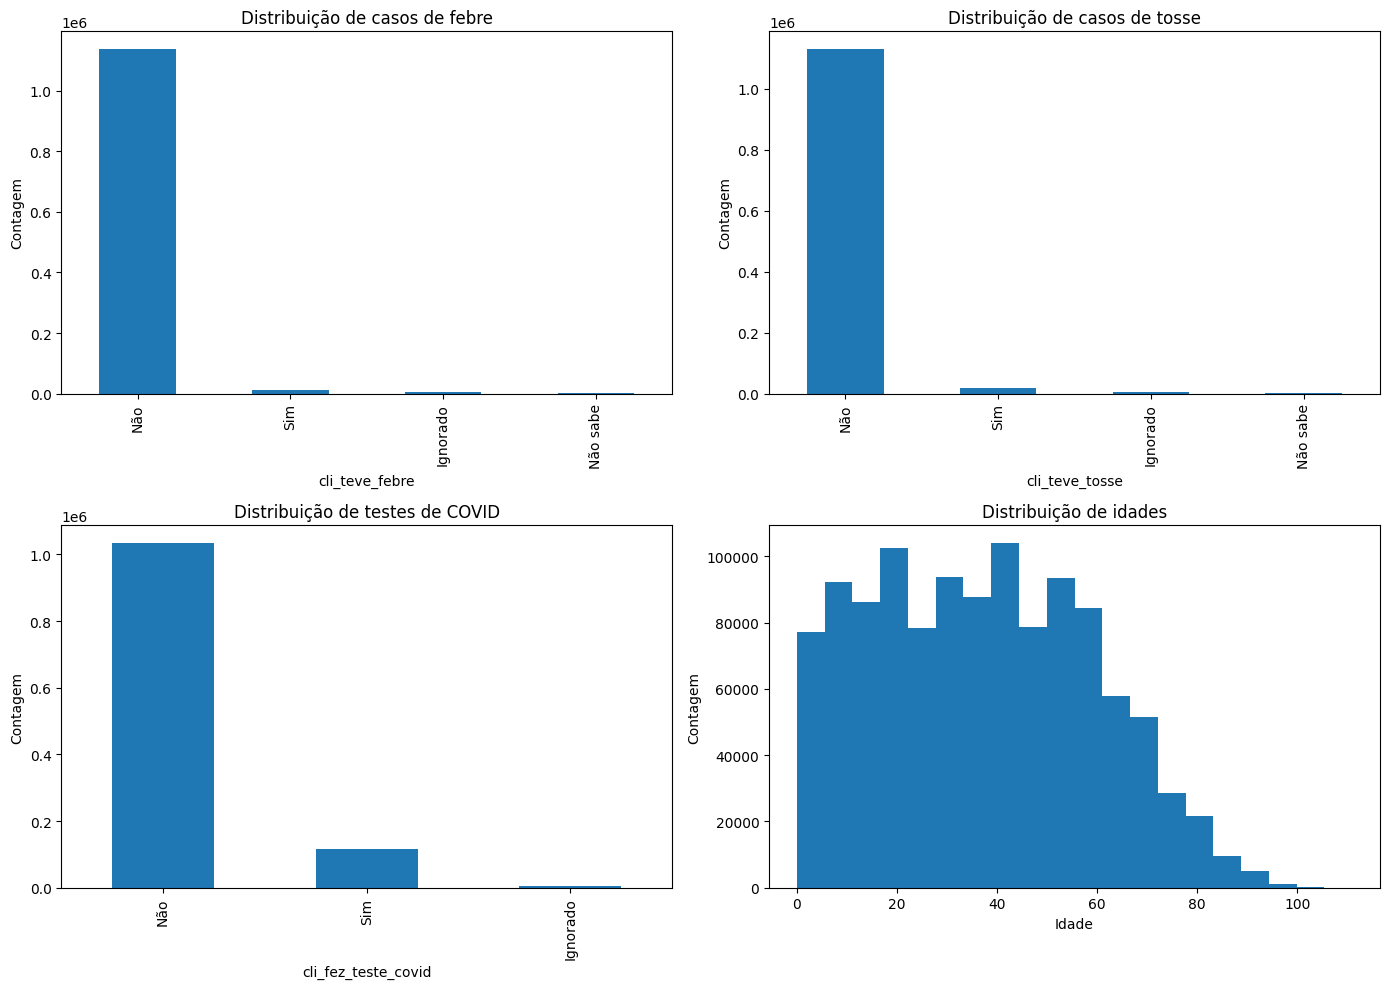

In [147]:
# tratando os tipos de dados
data['cli_teve_febre'] = data['cli_teve_febre'].astype('category')
data['cli_teve_tosse'] = data['cli_teve_tosse'].astype('category')
data['cli_teve_dor_de_garganta'] = data['cli_teve_dor_de_garganta']\
                                   .astype('category')
data['cli_fez_teste_covid'] = data['cli_fez_teste_covid'].astype('category')
data['pop_idade'] = pd.to_numeric(data['pop_idade'], errors='coerce')

# distribuição dos sintomas
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# plot 1: febre
data['cli_teve_febre'].value_counts().plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Distribuição de casos de febre')
ax[0, 0].set_ylabel('Contagem')

# plot 2: tosse
data['cli_teve_tosse'].value_counts().plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Distribuição de casos de tosse')
ax[0, 1].set_ylabel('Contagem')

# plot 3: testes de covid
data['cli_fez_teste_covid'].value_counts().plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Distribuição de testes de COVID')
ax[1, 0].set_ylabel('Contagem')

# plot 4: idade
data['pop_idade'].plot(kind='hist', bins=20, ax=ax[1, 1])
ax[1, 1].set_title('Distribuição de idades')
ax[1, 1].set_xlabel('Idade')
ax[1, 1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

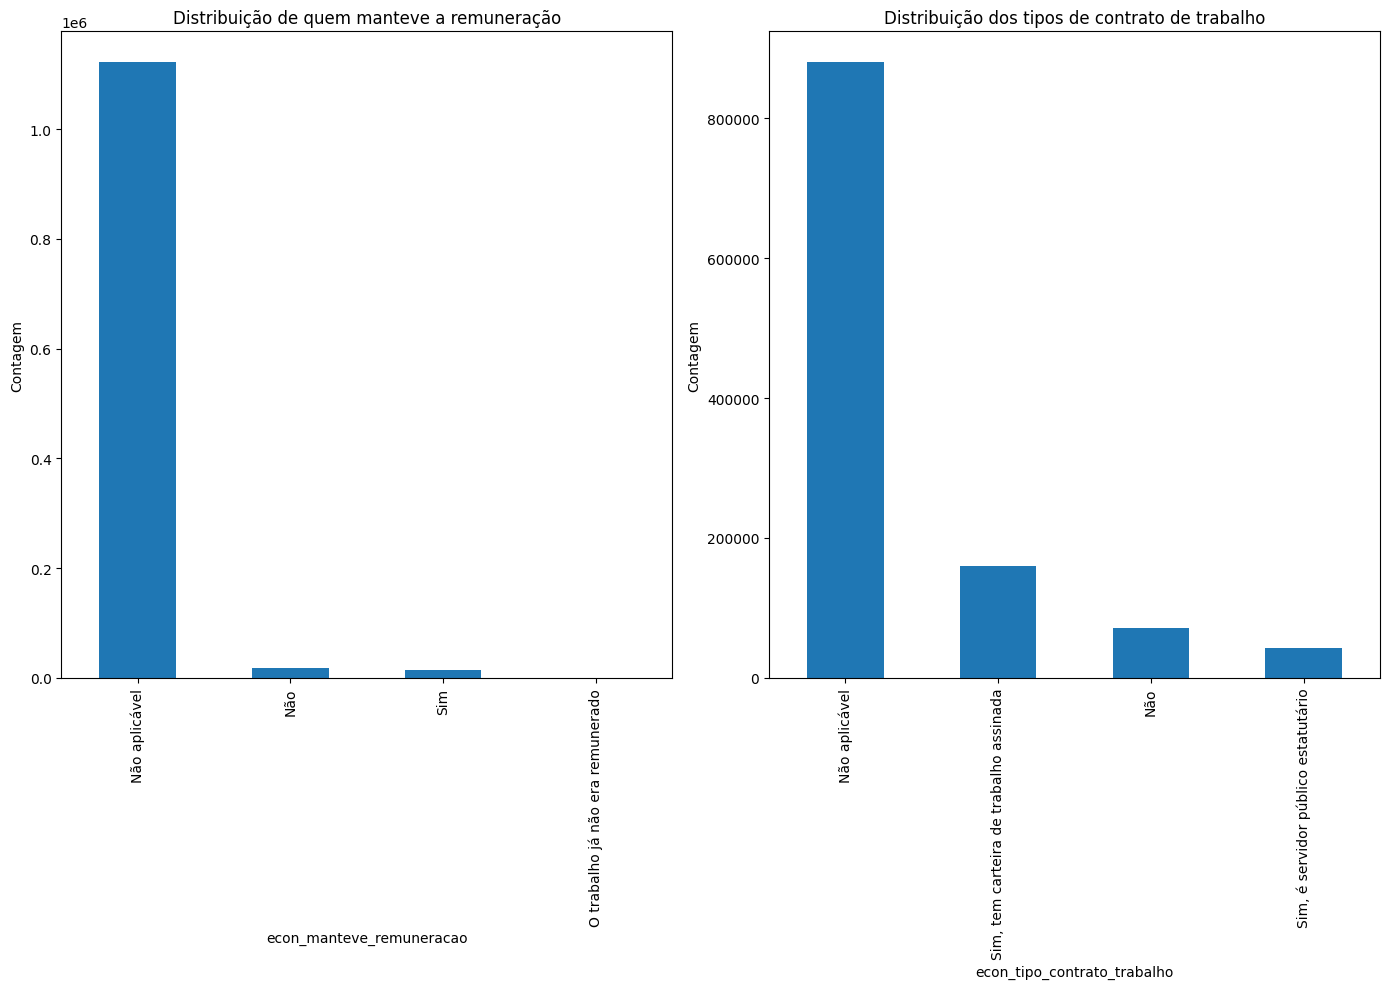

In [148]:
# dados econômicos
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

# plot 1: situação da remuneração
data['econ_manteve_remuneracao'] = data['econ_manteve_remuneracao']\
                                   .astype('category')
data['econ_manteve_remuneracao'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribuição de quem manteve a remuneração')
ax[0].set_ylabel('Contagem')

# plot 2: situação dos contratos de trabalho
data['econ_tipo_contrato_trabalho'] = data['econ_tipo_contrato_trabalho']\
                                      .astype('category')
data['econ_tipo_contrato_trabalho'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribuição dos tipos de contrato de trabalho')
ax[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()